## K-means clustering in general

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 0], [1, 1], [0, 2], [2, 1],
              [8, 1], [7, 2], [6, 3]]) # data points to be fitted using Frobenius norm.
              # This has got nothing to do with graph

kmeans = KMeans(n_clusters = 2, random_state=42).fit(X) # Didn't understand random_state
#kmeans = KMeans(n_clusters = 2, random_state=0).fit(X, sample_weight=np.array([0.5, 0.5, 0.5, 0.5, 0.01, 0.01, 0.01]))

print(kmeans.labels_) # what is the label for each cluster
print(kmeans.predict([[2, 3]])) # classifying a random point 
print(kmeans.cluster_centers_) # center of each cluster

[1 1 1 1 0 0 0]
[1]
[[7. 2.]
 [1. 1.]]
(7, 2)


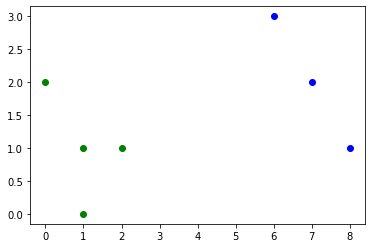

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(X[:, 0], X[:, 1])
cluster1 = []
cluster2 = []
for i in range(len(X)):
  if (kmeans.labels_)[i] == 0:
    cluster1.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 1:
    cluster2.append(list(X[i, :]))

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
plt.figure()
plt.scatter(cluster1[:, 0], cluster1[:, 1], c='b')
plt.scatter(cluster2[:, 0], cluster2[:, 1], c='g')
plt.show()

## K-means clustering using fort.101 and fort.303 as weights

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
weight = np.loadtxt("fort.101")[:, 1]
num_fitting_points = len(weight) # number of points in the given data to be fitted for sampling
#weight = np.array(list(weight))

# Arrange the data in proper array size i.e. (num_fitting_points,1)
X = np.arange(num_fitting_points) 
X_ = np.zeros((num_fitting_points, 1))
for i in range(len(X)):
  X_[i, 0] = X[i]
X = X_
print(weight.shape)
print(X.shape)
print(num_fitting_points)

(99,)
(99, 1)
99


### Sampling without weights

In [ ]:
# First let's do sampling without weights
#kmeans_w = KMeans(n_clusters=10, random_state=0).fit(X, sample_weight=weight)
num_clusters = 10
kmeans = KMeans(num_clusters, random_state=40).fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_[:,0])
#print(type(kmeans.cluster_centers_))

[9 9 9 9 9 9 9 9 9 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 5 5 5 5 5 5 5 5
 5 5 5 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6 6 6 6 8 8 8 8 8
 8 8 8 8 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4]
[45.  13.5 82.5 55.5 93.  34.  64.5 23.5 73.   4. ]


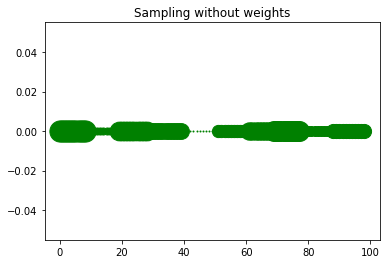

In [ ]:
import matplotlib.pyplot as plt
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
cluster10 = []
for i in range(num_fitting_points): # Putting points in one cluster in a single array
  if (kmeans.labels_)[i] == 0:
    cluster1.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 1:
    cluster2.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 2:
    cluster3.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 3:
    cluster4.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 4:
    cluster5.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 5:
    cluster6.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 6:
    cluster7.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 7:
    cluster8.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 8:
    cluster9.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 9:
    cluster10.append(list(X[i, :]))
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)
cluster5 = np.array(cluster5)
cluster6 = np.array(cluster6)
cluster7 = np.array(cluster7)
cluster8 = np.array(cluster8)
cluster9 = np.array(cluster9)
cluster10 = np.array(cluster10)

plt.figure()
# points marked by dots of same size are in the same sample
plt.scatter(cluster1[:, 0], np.zeros(len(list(cluster1))), c='g', s=1) 
plt.scatter(cluster2[:, 0], np.zeros(len(list(cluster2))), c='g', s=50)
plt.scatter(cluster3[:, 0], np.zeros(len(list(cluster3))), c='g', s=100)
plt.scatter(cluster4[:, 0], np.zeros(len(list(cluster4))), c='g', s=150)
plt.scatter(cluster5[:, 0], np.zeros(len(list(cluster5))), c='g', s=200)
plt.scatter(cluster6[:, 0], np.zeros(len(list(cluster6))), c='g', s=250)
plt.scatter(cluster7[:, 0], np.zeros(len(list(cluster7))), c='g', s=300)
plt.scatter(cluster8[:, 0], np.zeros(len(list(cluster8))), c='g', s=350)
plt.scatter(cluster9[:, 0], np.zeros(len(list(cluster9))), c='g', s=400)
plt.scatter(cluster10[:, 0], np.zeros(len(list(cluster10))), c='g', s=450)
plt.title("Sampling without weights")
plt.show()

### Sampling using weights

In [ ]:
# Now let's do sampling with weights
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=1).fit(X, sample_weight=weight)
print(kmeans.labels_)

[4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3 3 3 3 9 9 9 9 7 7 7 0 0 6 6 6 6 8 8 8 8 8 8 8 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2]


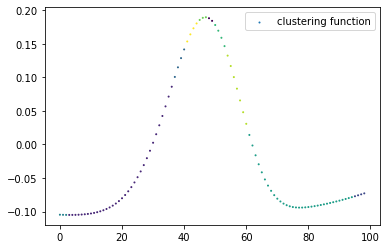

In [ ]:
####### SHORTCUT FOR PLOTTING #######

#plt.scatter(X, np.zeros((num_fitting_points, 1)), c=kmeans.labels_, label="clustering function", s=1)
plt.scatter(X, weight, c=kmeans.labels_, label="clustering function", s=1)
#plt.scatter(kmeans.cluster_centers_[:, 0], np.zeros((num_clusters, 1)), marker="x", label="cluster center")
plt.legend()

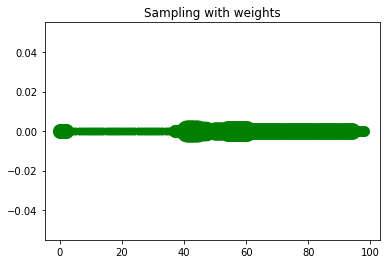

In [ ]:
## LONGCUT FOR PLOTTING ##
import matplotlib.pyplot as plt
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
cluster10 = []
for i in range(num_fitting_points): # Putting points in one cluster in a single array
  if (kmeans.labels_)[i] == 0:
    cluster1.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 1:
    cluster2.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 2:
    cluster3.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 3:
    cluster4.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 4:
    cluster5.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 5:
    cluster6.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 6:
    cluster7.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 7:
    cluster8.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 8:
    cluster9.append(list(X[i, :]))
  elif (kmeans.labels_)[i] == 9:
    cluster10.append(list(X[i, :]))
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)
cluster5 = np.array(cluster5)
cluster6 = np.array(cluster6)
cluster7 = np.array(cluster7)
cluster8 = np.array(cluster8)
cluster9 = np.array(cluster9)
cluster10 = np.array(cluster10)

plt.figure()
# points marked by dots of same size are in the same sample
plt.scatter(cluster1[:, 0], np.zeros(len(list(cluster1))), c='g', s=1) 
plt.scatter(cluster2[:, 0], np.zeros(len(list(cluster2))), c='g', s=50)
plt.scatter(cluster3[:, 0], np.zeros(len(list(cluster3))), c='g', s=100)
plt.scatter(cluster4[:, 0], np.zeros(len(list(cluster4))), c='g', s=150)
plt.scatter(cluster5[:, 0], np.zeros(len(list(cluster5))), c='g', s=200)
plt.scatter(cluster6[:, 0], np.zeros(len(list(cluster6))), c='g', s=250)
plt.scatter(cluster7[:, 0], np.zeros(len(list(cluster7))), c='g', s=300)
plt.scatter(cluster8[:, 0], np.zeros(len(list(cluster8))), c='g', s=350)
plt.scatter(cluster9[:, 0], np.zeros(len(list(cluster9))), c='g', s=400)
plt.scatter(cluster10[:, 0], np.zeros(len(list(cluster10))), c='g', s=450)
plt.title("Sampling with weights")
plt.show()

# Cartesian product of fort.101's first column sampling along x and fort.301's first row sampling along y. Make plot. On the same plot, cartesian product of fort.101's second column sampling along x and fort.301's second row sampling along y. Make plot. Do the same for all columns in 101 and all rows in 303. These files are in Shannon

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

## Longer and rough code

In [ ]:
# Firstly let's do sampling along x
%cd /content/drive/MyDrive/shannon
weightx = np.loadtxt("fort.101")[:, 0]
num_fitting_points = len(weightx)

# Arrange the data in proper array size i.e. (num_fitting_points,1)
X = np.arange(num_fitting_points)
X_ = np.zeros((num_fitting_points, 1))
for i in range(len(X)):
  X_[i, 0] = X[i]
X = X_
print("Shape of array to be fitted in clustering algo is " + str(X.shape))
print("Shape of weights array is " + str(weightx.shape))
print("Number of points to be fitted is " + str(num_fitting_points))

/content/drive/MyDrive/shannon
Shape of array to be fitted in clustering algo is (99, 1)
Shape of weights array is (99,)
Number of points to be fitted is 99


In [ ]:
# Now let's actually do sampling along x with weights
num_clusters = 10
kmeansx = KMeans(n_clusters=num_clusters, 
                random_state=0).fit(X, sample_weight=weightx)
print("Labels for clustering of fine grid is " 
      + str(kmeansx.labels_))
print("Coordinates of centroids in clustered grid is " 
      + str(kmeansx.cluster_centers_))

Labels for clustering of fine grid is [3 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 6 4 4 9 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Coordinates of centroids in clustered grid is [[ 53.24984681]
 [ 53.32049481]
 [ 48.61131476]
 [-47.05453277]
 [ 49.        ]
 [ 53.17781815]
 [ 49.        ]
 [ 48.1118144 ]
 [151.2126192 ]
 [ 53.10451825]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


In [ ]:
# Secondly let's do sampling along y
%cd /content/drive/MyDrive/shannon
weighty = np.loadtxt("fort.301")[0, :]
num_fitting_points = len(weighty)

# Arrange the data in proper array size i.e. (num_fitting_points,1)
Y = np.arange(num_fitting_points)
Y_ = np.zeros((num_fitting_points, 1))
for i in range(len(Y)):
  Y_[i, 0] = Y[i]
Y = Y_
print("Shape of array to be fitted in clustering algo is " + str(Y.shape))
print("Shape of weights array is " + str(weighty.shape))
print("Number of points to be fitted is " + str(num_fitting_points))

/content/drive/MyDrive/shannon
Shape of array to be fitted in clustering algo is (99, 1)
Shape of weights array is (99,)
Number of points to be fitted is 99


In [ ]:
# Now let's actually do sampling along y with weights
num_clusters = 10
kmeansy = KMeans(n_clusters=num_clusters, 
                random_state=1).fit(Y, sample_weight=weighty)
print("Labels for clustering of fine grid is " 
      + str(kmeansy.labels_))
print("Coordinates of centroids in clustered grid is " 
      + str(kmeansy.cluster_centers_))

Labels for clustering of fine grid is [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 3 3 7 9 9 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Coordinates of centroids in clustered grid is [[ 52.65768237]
 [-59.00671133]
 [148.6196907 ]
 [ 48.61534286]
 [ 45.37787601]
 [ 48.61763115]
 [ 52.6341351 ]
 [ 49.        ]
 [ 49.12493142]
 [ 49.61409241]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


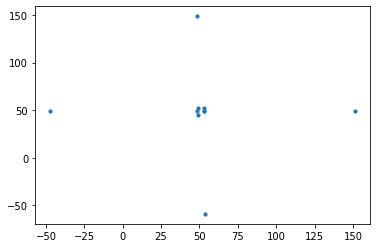

In [ ]:
# Plotting cluster centers along y versus cluster centers along x
import matplotlib.pyplot as plt
plt.scatter(kmeansx.cluster_centers_, kmeansy.cluster_centers_, s=10)
plt.show()

## Shorter and main code

In [ ]:
# Doing clustering
num_rows_cols = 5 # number of rows in fort.101 or cols in fort.301
x = [] # we will input sampled points of each row of fort.101 here; 
       # sampled points for a single row being in one array
y = [] # # we will input sampled points of each col of fort.301 here; 
       # sampled points for a single row being in one array

for n in range(num_rows_cols):
  # Firstly let's do sampling along x
  %cd /content/drive/MyDrive/shannon
  weightx = np.abs(np.loadtxt("fort.101")[:, n])
  num_fitting_points = len(weightx)

  # Arrange the data in proper array size i.e. (num_fitting_points,1)
  X = np.arange(num_fitting_points)
  X_ = np.zeros((num_fitting_points, 1))
  for i in range(len(X)):
    X_[i, 0] = X[i]
  X = X_

  # Now let's actually do sampling along x with weights
  num_clusters = 5
  kmeansx = KMeans(n_clusters=num_clusters, 
                  random_state=0).fit(X, sample_weight=weightx)
  print("Labels for clustering of fine grid along x is " 
        + str(kmeansx.labels_))
  print("Coordinates of centroids in clustered grid along x is " 
        + str(kmeansx.cluster_centers_))
  
  # Secondly let's do sampling along y
  %cd /content/drive/MyDrive/shannon
  weighty = np.abs(np.loadtxt("fort.301")[n, :])
  num_fitting_points = len(weighty)

  # Arrange the data in proper array size i.e. (num_fitting_points,1)
  Y = np.arange(num_fitting_points)
  Y_ = np.zeros((num_fitting_points, 1))
  for i in range(len(Y)):
    Y_[i, 0] = Y[i]
  Y = Y_

  # Now let's actually do sampling along y with weights
  num_clusters = 5
  kmeansy = KMeans(n_clusters=num_clusters, 
                  random_state=1).fit(Y, sample_weight=weighty)
  print("Labels for clustering of fine grid along y is " 
        + str(kmeansy.labels_))
  print("Coordinates of centroids in clustered grid along y is " 
        + str(kmeansy.cluster_centers_))
  
  x.append(kmeansx.cluster_centers_)
  y.append(kmeansy.cluster_centers_)

/content/drive/MyDrive/shannon
Labels for clustering of fine grid along x is [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Coordinates of centroids in clustered grid along x is [[86.76367556]
 [46.97448918]
 [28.40005186]
 [65.94734565]
 [ 9.11683457]]
/content/drive/MyDrive/shannon
Labels for clustering of fine grid along y is [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Coordinates of centroids in clustered grid along y is [[87.59131641]
 [29.86491561]
 [49.21065086]
 [ 9.80264605]
 [67.50633227]]
/content/drive/MyDrive/shannon
Labels for clustering of fine grid along x is [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4

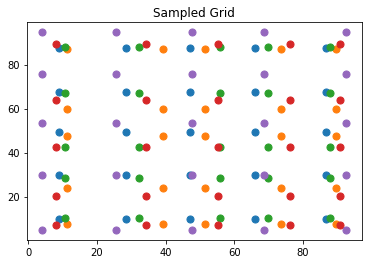

In [ ]:
# Let's plot all samples in the same plot
import matplotlib.pyplot as plt
plt.figure()
for n in range(num_rows_cols):
  setproduct = np.zeros(shape=(num_clusters**2, 2)) # in each iteration this
  X_ = x[n]                                         # array is used for each row&col pair
  Y_ = y[n]
  for i in range(num_clusters):
    for j in range(num_clusters):
      setproduct[i*num_clusters + j, 0] = X_[i]
      setproduct[i*num_clusters + j, 1] = Y_[j]
  plt.scatter(setproduct[:, 0], setproduct[:, 1], s=50, label=str(n))
  #plt.legend()
plt.title("Sampled Grid")
plt.show()

# Performing clustering on the SVD

number of clusters varying for each row&column plot. 
Cartesian product of fort.101's first column sampling along x 
and fort.301's first row sampling along y. 
Make plot. On the same plot, Cartesian product of fort.101's 
second column sampling along x and fort.301's second row
sampling along y. Make plot. Do the same for all columns in 101
and all rows in 303. These files are in Shannon

In [ ]:
import numpy as np
N_clusters_2d = 150 # number of points on the 2d plot.

In [ ]:
# deciding the number of clusters depending on singular values
%cd /content/drive/MyDrive/shannon
sing_vals = np.loadtxt("fort.201") # these are the weights. They are truncated to 
                                   # 5 X 5 diagonal matrix. Each element of this 
                                   # matrix tells us how important the corresponding layer is
sing_vals /= np.sum(sing_vals) # normalizing the data
print("normalized singular values data from corresponding file is " + 
      str(sing_vals) + " and its shape is " + str(sing_vals.shape))

/content/drive/MyDrive/shannon
normalized singular values data from corresponding file is [0.88638723 0.09255785 0.01382044 0.00522779 0.00200669] and its shape is (5,)


In [ ]:
## The code is not yet optimized to minimize the error in doing integer approximations
num_clusters_2d = N_clusters_2d
num_clusters_2d *= sing_vals # rough number of clusters for each
                             # row&col pair
                             # More important layer will be given
                             # more cluster points
# Since we have normailzed sing_vals we can be sure that sum(num_clusters_2d) = N_cluster_2d.
# However each element of num_clusters_2d need not be an integer, but we needn't 
# worry about that at this step
num_clusters_1d = np.sqrt(num_clusters_2d) # approximate numbers of samples to be taken along each row/col

# However each element of num_clusters_1d need not be an integer, so let's ensure that now
num_clusters_1d = list(num_clusters_1d)
for n in range(len(num_clusters_1d)):
  num_clusters_1d[n] = int(num_clusters_1d[n])
  if num_clusters_1d[n] == 0: # Since number of clusters being zero does not make any sense,
    num_clusters_1d[n] = 1   # change it to one if it is zero
num_clusters_1d = np.array(num_clusters_1d)
print("Array containing number of clusters along each row/col is " + 
      str(num_clusters_1d) + " and its shape is " + str(num_clusters_1d.shape))

Array containing number of clusters along each row/col is [11  3  1  1  1] and its shape is (5,)


In [ ]:
# Doing clustering
from sklearn.cluster import KMeans

num_rows_cols = len(sing_vals) # number of rows in fort.101 or cols in fort.301
x = [] # we will input sampled points of each row of fort.101 here; 
       # sampled points for a single row being in one array
y = [] # we will input sampled points of each col of fort.301 here; 
       # sampled points for a single row being in one array

weight_x = np.loadtxt("fort.101")
weight_y = np.loadtxt("fort.301")
print("Number of points in unclustered grid = " + str((weight_x.shape)[0]) + # ???????????
      " X " + str((weight_y.shape)[1]) + " X " + str((weight_x.shape)[1]))

for n in range(num_rows_cols):
  # Firstly let's do sampling along x
  wx = np.abs(weight_x[:, n])
  #wx -= np.min(wx) # Shifting the function by it's minimum value so that it becomes more apparent
  n_fit = len(wx) # number of fitting points
  wx = np.reshape(wx, (n_fit,))
  wx /= np.linalg.norm(wx, ord=2)

  # Arrange the data in proper array size i.e. (num_fitting_points,1)
  X = np.reshape(np.arange(n_fit), (n_fit, 1)) # reshapes 1d array to
                                               # 2d array with one column
  # Now let's actually do sampling along x with weights
  num_clusters = num_clusters_1d[n]
  kmeansx = KMeans(n_clusters=num_clusters, tol=1e-12).fit(X, sample_weight=wx)
  ##print("Labels for clustering of fine grid is " 
  ##      + str(kmeansx.labels_))
  print("Coordinates of centroids along x in clustered grid is " 
        + str(kmeansx.cluster_centers_))
  
  # Secondly let's do sampling along y
  wy = np.abs(weight_y[n, :])
  wy -= np.min(wy) # Shifting the function by it's minimum value so that it becomes more apparent
  n_fit = len(wy)
  wy = np.reshape(wy, (n_fit,))
  wy /= np.linalg.norm(wy, ord=2)

  # Arrange the data in proper array size i.e. (num_fitting_points,1)
  Y = np.reshape(np.arange(n_fit), (n_fit, 1)) # reshapes 1d array to
                                               # 2d array with one column

  # Now let's actually do sampling along y with weights
  num_clusters = num_clusters_1d[n]
  kmeansy = KMeans(n_clusters=num_clusters, tol=1e-12).fit(Y, sample_weight=wy)
  #print("Labels for clustering of fine grid is " 
  #      + str(kmeansy.labels_))
  print("Coordinates of centroids along y in clustered grid is " 
        + str(kmeansy.cluster_centers_))
  
  x.append((kmeansx.cluster_centers_)) # So we are making a list of arrays
  y.append((kmeansy.cluster_centers_))

Number of points in unclustered grid = 99 X 99 X 5
Coordinates of centroids along x in clustered grid is [[93.31078322]
 [41.04378968]
 [13.53673109]
 [65.88615485]
 [23.58466979]
 [56.8728162 ]
 [74.92135516]
 [83.89418444]
 [33.10633715]
 [ 4.02448696]
 [48.47949953]]
Coordinates of centroids along y in clustered grid is [[40.18199111]
 [64.26411327]
 [ 6.63469884]
 [90.45824192]
 [24.25334464]
 [55.93481529]
 [81.61159118]
 [15.30902411]
 [72.5949294 ]
 [32.75626213]
 [47.62986254]]
Coordinates of centroids along x in clustered grid is [[11.9656558 ]
 [46.53295149]
 [81.80814958]]
Coordinates of centroids along y in clustered grid is [[53.66627113]
 [15.2911657 ]
 [86.64190546]]
Coordinates of centroids along x in clustered grid is [[47.77852658]]
Coordinates of centroids along y in clustered grid is [[53.95209099]]
Coordinates of centroids along x in clustered grid is [[45.13359443]]
Coordinates of centroids along y in clustered grid is [[52.20334971]]
Coordinates of centroids alon

In [ ]:
## aside
wx = weight_x[:, 0]
#print(wx)
n_fit = len(wx)
X = np.reshape(np.arange(n_fit), (n_fit, 1))
kmeansx = KMeans(n_clusters=10, tol=1e-12).fit(X, sample_weight=wx)
kmeansx.cluster_centers_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  


array([[ 53.24984681],
       [-47.05453277],
       [ 53.32049481],
       [ 48.61131476],
       [ 49.        ],
       [ 49.        ],
       [ 53.17781815],
       [ 53.10451825],
       [ 48.1118144 ],
       [151.2126192 ]])

In [ ]:
## aside
weight_y

array([[-7.46465789e-02, -7.57111480e-02, -7.67391382e-02,
        -7.77300115e-02, -7.86834500e-02, -7.95993538e-02,
        -8.04778594e-02, -8.13193519e-02, -8.21244863e-02,
        -8.28942124e-02, -8.36298069e-02, -8.43329084e-02,
        -8.50055599e-02, -8.56502528e-02, -8.62699732e-02,
        -8.68682461e-02, -8.74491765e-02, -8.80174791e-02,
        -8.85784980e-02, -8.91382069e-02, -8.97031888e-02,
        -9.02805901e-02, -9.08780465e-02, -9.15035780e-02,
        -9.21654538e-02, -9.28720259e-02, -9.36315350e-02,
        -9.44518921e-02, -9.53404397e-02, -9.63037008e-02,
        -9.73471213e-02, -9.84748145e-02, -9.96893163e-02,
        -1.00991359e-01, -1.02379674e-01, -1.03850826e-01,
        -1.05399093e-01, -1.07016396e-01, -1.08692276e-01,
        -1.10413939e-01, -1.12166348e-01, -1.13932392e-01,
        -1.15693101e-01, -1.17427931e-01, -1.19115105e-01,
        -1.20731997e-01, -1.22255570e-01, -1.23662850e-01,
        -1.24931421e-01, -1.26039950e-01, -1.26968706e-0

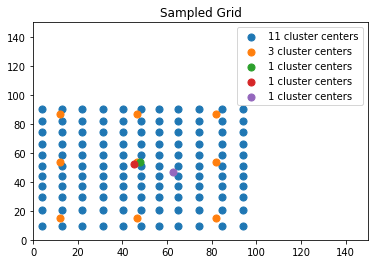

In [ ]:
# Let's plot all samples in the same plot
import matplotlib.pyplot as plt
plt.figure()
for n in range(num_rows_cols):
  num_clusters = num_clusters_1d[n]
  setproduct = np.zeros(shape=(num_clusters**2, 2)) # in each iteration this
  X_ = x[n]                                         # array is used for each row&col pair
  Y_ = y[n]
  for i in range(num_clusters): # num_clusters == len(X_) == len(Y_)
    for j in range(num_clusters):
      setproduct[i*num_clusters + j, 0] = X_[i]
      setproduct[i*num_clusters + j, 1] = Y_[j]
  plt.scatter(setproduct[:, 0], setproduct[:, 1], s=50, label=str(num_clusters)+" cluster centers")
  plt.legend()
plt.xlim(0, 150)
plt.ylim(0, 150)
plt.title("Sampled Grid")
plt.show()

In [ ]:
# Let's make a 2d array with 2 cols in which
# the first col contains all x coordinates in
# plot and second col contains all y coordinates

X__ = []
Y__ = []
for n in range(num_rows_cols):
  num_clusters = num_clusters_1d[n]
  X_ = x[n]
  Y_ = y[n]
  for i in range(num_clusters): # num_clusters == len(X_) == len(Y_)
    for j in range(num_clusters):
      X__.append(X_[i])
      Y__.append(Y_[j])
# Now we have a list of all x coords and a list of y coords of sampled points
X__ = np.array([X__])
Y__ = np.array([Y__])
# Now we have converted both lists to row vectors. Let us
# now reshape the row vectors to column vectors
X__ = np.reshape(X__, ((X__.shape)[1], 1))
Y__ = np.reshape(Y__, ((Y__.shape)[1], 1))
combinedCoords = np.hstack((X__, Y__))
print("Shape of all clustered points stacked together are " + str(combinedCoords.shape))
print("All clustered points stacked together are " + str(combinedCoords))

Shape of all clustered points stacked together are (133, 2)
All clustered points stacked together are [[ 4.02448696 89.81307403]
 [ 4.02448696 34.32985288]
 [ 4.02448696 57.92560715]
 [ 4.02448696 16.28849113]
 [ 4.02448696 73.17988126]
 [ 4.02448696 25.26050044]
 [ 4.02448696 51.0458633 ]
 [ 4.02448696  7.27632991]
 [ 4.02448696 43.25706654]
 [ 4.02448696 65.24653866]
 [ 4.02448696 81.19783079]
 [57.86765351 89.81307403]
 [57.86765351 34.32985288]
 [57.86765351 57.92560715]
 [57.86765351 16.28849113]
 [57.86765351 73.17988126]
 [57.86765351 25.26050044]
 [57.86765351 51.0458633 ]
 [57.86765351  7.27632991]
 [57.86765351 43.25706654]
 [57.86765351 65.24653866]
 [57.86765351 81.19783079]
 [83.89418444 89.81307403]
 [83.89418444 34.32985288]
 [83.89418444 57.92560715]
 [83.89418444 16.28849113]
 [83.89418444 73.17988126]
 [83.89418444 25.26050044]
 [83.89418444 51.0458633 ]
 [83.89418444  7.27632991]
 [83.89418444 43.25706654]
 [83.89418444 65.24653866]
 [83.89418444 81.19783079]
 [31.58

# Clustering on the full sampling function

/content/drive/MyDrive/shannon
Shape of full weights are (9801,)
Shape of data to be fitted is (9801, 2)


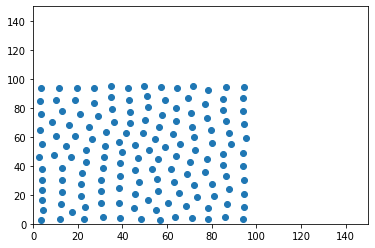

Coordinates for centroids in full grid are [[57.51347581 75.34037131]
 [38.28816586 14.66692287]
 [80.86220486 19.48615949]
 [23.73418885 50.8624128 ]
 [10.33825902 85.23537211]
 [72.70686506 51.01338326]
 [ 4.01978892 23.01148863]
 [69.40942403 86.46929169]
 [61.57144927 38.03264054]
 [86.30290372 71.10758391]
 [41.71375481 62.4049521 ]
 [63.6696616   4.59414704]
 [34.93825038 95.15473447]
 [ 3.81691751 54.8312588 ]
 [12.58332608 13.6772839 ]
 [38.66932418 32.90979105]
 [94.3856249  94.44702097]
 [94.11710442 48.71572917]
 [28.84220686 74.02829488]
 [21.63969211 27.39904494]
 [46.99905829 45.17187001]
 [65.26990555 20.99877718]
 [93.89310714 40.06274797]
 [54.49048247 58.38895329]
 [ 2.87782038 64.81200435]
 [31.05285621  4.83459582]
 [77.11545741 35.88735908]
 [27.18858613 93.40006464]
 [64.1400423  70.74658783]
 [13.06575193 38.56434974]
 [50.96819117 88.13843591]
 [78.29132386 11.22665033]
 [47.52548927 28.87711376]
 [76.94497575 82.56557712]
 [93.89524164 78.03521262]
 [43.3403208

In [ ]:
# Sampling for the full grid combined
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%cd /content/drive/MyDrive/shannon
full_w = np.loadtxt('fw.txt') # This file contains weights for the full grid combined
print("Shape of full weights are " + str(full_w.shape))
X1, X2 = np.meshgrid(np.arange(99), np.arange(99))
long_X1 = np.reshape(X1,(len(X1)*len(X1),1)) # unsampled points to be put along x axis
long_X2 = np.reshape(X2,(len(X2)*len(X2),1)) # unsampled points to be put along y axis
X = np.hstack((long_X1, long_X2))
print("Shape of data to be fitted is " + str(X.shape))
# We will now sample N_clusters_2d (=150) points out of 100 X 100 points
kmeans_full = KMeans(n_clusters=N_clusters_2d).fit(X, sample_weight=full_w)
plt.figure()
plt.scatter(kmeans_full.cluster_centers_[:, 0], kmeans_full.cluster_centers_[:, 1])
plt.xlim(0, 150)
plt.ylim(0, 150)
plt.show()
print("Coordinates for centroids in full grid are " + str(kmeans_full.cluster_centers_))

# KD trees to find difference between both graphs

In [ ]:
# Saving the clustered points in a file in the directory mentioned below
%cd /content/drive/MyDrive/shannon/inputs/

np.savetxt("sampledPoints_later.txt", combinedCoords)
np.savetxt("sampledPoints_initial.txt", kmeans_full.cluster_centers_)

/content/drive/MyDrive/shannon/inputs


In [ ]:
''' Run the previous cell before running this'''
# KD trees to find difference between both graphs
%cd /content/drive/MyDrive/shannon/analysis/
!bash make.bash

/content/drive/MyDrive/shannon/analysis
No. of bins considered: 14
[0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4.  4.4 4.8 5.2 5.6]
[1, 5, 8, 10, 8, 15, 10, 22, 17, 11, 12, 9, 3, 2]
<Figure size 640x480 with 0 Axes>
<Figure size 640x480 with 1 Axes>
No. of bins considered: 15
[0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4.  4.4 4.8 5.2 5.6 6. ]
[2, 3, 7, 11, 8, 14, 20, 16, 16, 20, 12, 12, 6, 2, 1]
<Figure size 640x480 with 0 Axes>
<Figure size 640x480 with 1 Axes>


# Comparing clustered points in n-dimensions using Gaussian overlap

### Using Slider for sigma

Calling coordinate arrays data

In [ ]:
# Renaming the variable that stores coordinates of cluster centers in both plots
plot1_coords = combinedCoords # shape of this 2d array is (number of clusters, n)
plot2_coords = kmeans_full.cluster_centers_ # shape of this is (number of clusters, n)
# Code for variable names on the right need to be modified in above sections to 
# account for n dimensions

n_dim = (plot1_coords.shape)[-1] # since plot1_coords.shape will be the tuple (number of clusters, n)
print("Number of dimensions in clustered points is " + str(n_dim))

Number of dimensions in clustered points is 2


Now perform the overlap

In [ ]:
import numpy as np

def sumGaussians(x, plot_coords, sigma): # x is a point in plot1
                                         # plot_coords will be plot1_coords or plot2_coords
                                         # sigma is width of Gaussian
  beta = 1./(sigma * np.sqrt(2*np.pi)) # amplitude of gaussian

  sum_Gauss = 0 # variable for summing up all the Gaussian function values of x
  for n_ in range((plot_coords.shape)[0]): #(plot_coords.shape)[0] == number of clusters in plot
    x_ = plot_coords[n_, :] # x_ is a point in plot
    Gauss = beta * np.exp(-((x_ - x)**2)/(2. * sigma**2)) # array containing values of Gaussian
                                                          # around x_i, at xi for each i
    sum_Gauss += np.prod(Gauss) # product of exponentials for each dimension
  return sum_Gauss

In [ ]:
# Calculating the inner product and using slider

def update_result(sigma__):
  
  innerprod = 0 # This variable will store the final inner product
  normalize1 = 0 # L2 norm of sum of Gaussians for x (a point in plot1) on first graph
  normalize2 = 0 # L2 norm of sum of Gaussians for x (a point in plot1) on second graph
  sigma = sigma__ # width of Gaussian

  for n in range((plot1_coords.shape)[0]): # n-th row in plot1_coords
    x = plot1_coords[n, :] # x a point in plot1
    innerprod += ( sumGaussians(x=x, plot_coords=plot1_coords, sigma=sigma) * 
                  (sumGaussians(x=x, plot_coords=plot2_coords, sigma=sigma)) )

    normalize1 += sumGaussians(x=x, plot_coords=plot1_coords, sigma=sigma)**2
    normalize2 += sumGaussians(x=x, plot_coords=plot2_coords, sigma=sigma)**2

  # innerprod is unnormalized as of now
  normalize1 = np.sqrt(normalize1)
  normalize2 = np.sqrt(normalize2)
  normalize = normalize1 * normalize2 # dividing innerprod with normalize will lead to normalized innerprod

  innerprod /= normalize
  print("Inner product of both plots is " + str(innerprod))

import ipywidgets as wig
from IPython.display import display
layout = wig.Layout(width='1000px')
# sigma_ = wig.FloatSlider(description = "sigma", value = 2.01, min = 0.01, max = 40., step = 0.01,
#                         layout = layout) # sigma is unrelated to gridsize here

gridsize = 2 # Taking gridsize = 2 Angstrom
sigma_ = wig.FloatSlider(description = "sigma", value = 0.1*gridsize, min = 0.01*gridsize,
                         max = 1.0*gridsize, step = 0.01*gridsize, layout = layout) # relating sigma to gridsize
wig.interact(update_result, sigma__=sigma_) # Note that for very large value of sigma (which should not be taken) 
                                            # we are getting less overlap obviously

interactive(children=(FloatSlider(value=0.2, description='sigma', layout=Layout(width='1000px'), max=2.0, min=…

<function __main__.update_result>

### By finding optimal sigma

Calling coordinate arrays data

In [ ]:
# Renaming the variable that stores coordinates of cluster centers in both plots
plot1_coords = combinedCoords # shape of this 2d array is (number of clusters, n)
plot2_coords = kmeans_full.cluster_centers_ # shape of this is (number of clusters, n)
# Code for variable names on the right need to be modified in above sections to 
# account for n dimensions

n_dim = (plot1_coords.shape)[-1] # since plot1_coords.shape will be the tuple (number of clusters, n)
print("Number of dimensions in clustered points is " + str(n_dim))

Number of dimensions in clustered points is 2


Finding optimal sigma

In [ ]:
# Suppose the simplest case where points on plot are equally spaced. Then of spacing points of one layer along one 
# axis ~ unclustered number of points of one layer along that axis / number of clustered points along that axis in total
gap = int(weight_x.shape[0])/np.sqrt(N_clusters_2d) # Approximate spacing between ponts of one layer along one axis
print("Approximate spacing between ponts of one layer along one axis is " + str(gap))

# Let's say that we shall take sigma = gap. Now find p such that p% of the total number 
# of points, in a single plot, have neigbours at distance less than sigma.
from scipy import spatial
def find_p(sigma, coordinates_array): # coordinates_array contains the coordinates
                                      # of each point along its rows
  count = 0
  tree = spatial.KDTree(coordinates_array)
  for point_number in range(coordinates_array.shape[0]): # which point it is
    point = coordinates_array[point_number, :]
    count += len(set(tree.query_ball_point(point, sigma))) 
    count -= 1 # to exclude the count of zero distance of with itself
  return (count / (coordinates_array.shape)[0]) * 100 # since we want p in percent

Approximate spacing between ponts of one layer along one axis is 8.083316151184487


In [ ]:
sigma = gap
p = find_p(sigma=sigma, coordinates_array=plot2_coords) # choosing plot2 since it has more number of points

while(p > 5): # p must be less than 5% for sigma to be finalized
  sigma *= 0.90 # sigma = 90% * sigma
  p = find_p(sigma=sigma, coordinates_array=plot2_coords) # choosing plot2 since it has more number of points
  print(str(p) + " % of points have neighbours at distance less than " + str(sigma))
print("Choosing sigma = " + str(sigma))

33.33333333333333 % of points have neighbours at distance less than 7.274984536066039
5.333333333333334 % of points have neighbours at distance less than 6.547486082459435
0.0 % of points have neighbours at distance less than 5.892737474213492
Choosing sigma = 5.892737474213492


Now perform the overlap

In [ ]:
import numpy as np

def sumGaussians(x, plot_coords, sigma): # x is a point in plot1
                                         # plot_coords will be plot1_coords or plot2_coords
                                         # sigma is width of Gaussian
  beta = 1./(sigma * np.sqrt(2*np.pi)) # amplitude of gaussian

  sum_Gauss = 0 # variable for summing up all the Gaussian function values of x
  for n_ in range((plot_coords.shape)[0]): #(plot_coords.shape)[0] == number of clusters in plot
    x_ = plot_coords[n_, :] # x_ is a point in plot
    Gauss = beta * np.exp(-((x_ - x)**2)/(2. * sigma**2)) # array containing values of Gaussian
                                                          # around x_i, at xi for each i
    sum_Gauss += np.prod(Gauss) # product of exponentials for each dimension
  return sum_Gauss

In [ ]:
# Calculating the inner product

def update_result(sigma__):
  
  innerprod = 0 # This variable will store the final inner product
  normalize1 = 0 # L2 norm of sum of Gaussians for x (a point in plot1) on first graph
  normalize2 = 0 # L2 norm of sum of Gaussians for x (a point in plot1) on second graph
  sigma = sigma__ # width of Gaussian

  for n in range((plot1_coords.shape)[0]): # n-th row in plot1_coords
    x = plot1_coords[n, :] # x a point in plot1
    innerprod += ( sumGaussians(x=x, plot_coords=plot1_coords, sigma=sigma) * 
                  (sumGaussians(x=x, plot_coords=plot2_coords, sigma=sigma)) )

    normalize1 += sumGaussians(x=x, plot_coords=plot1_coords, sigma=sigma)**2
    normalize2 += sumGaussians(x=x, plot_coords=plot2_coords, sigma=sigma)**2

  # innerprod is unnormalized as of now
  normalize1 = np.sqrt(normalize1)
  normalize2 = np.sqrt(normalize2)
  normalize = normalize1 * normalize2 # dividing innerprod with normalize will lead to normalized innerprod

  innerprod /= normalize
  print("Inner product of both plots is " + str(innerprod))

update_result(sigma__=sigma)


Inner product of both plots is 0.9839914802485644


### Choice of sigma depending only on gridsize

In [ ]:
''' By the way our gridsize is 1 Angstrom or 2 Angstrom.
 We need not do anything about that in the following code
since we only need a fraction of x-axis and y-axis limits'''

' By the way our gridsize is 1 Angstrom or 2 Angstrom.\n We need not do anything about that in the following code\nsince we only need a fraction of x-axis and y-axis limits'

Calling coordinate arrays data

In [ ]:
# Renaming the variable that stores coordinates of cluster centers in both plots
plot1_coords = combinedCoords # shape of this 2d array is (number of clusters, n)
plot2_coords = kmeans_full.cluster_centers_ # shape of this is (number of clusters, n)
# Code for variable names on the right need to be modified in above sections to 
# account for n dimensions

n_dim = (plot1_coords.shape)[-1] # since plot1_coords.shape will be the tuple (number of clusters, n)
print("Number of dimensions in clustered points is " + str(n_dim))

Number of dimensions in clustered points is 2


Calculating limits of x and y axis. 

In [ ]:
# Using plot2 to calculate limits since it has more points
limitX = np.amax(plot2_coords[:, 0], axis=0) - np.amin(plot2_coords[:, 0], axis=0) # axis = 1 would give the entire column as output
limitY = np.amax(plot2_coords[:, 1], axis=0) - np.amin(plot2_coords[:, 1], axis=0)
#gridsize = np.min([limitX, limitY])
gridsize = 100 # Keep gridsize a constant`
print("Approximate gridsize is " + str(gridsize))

Approximate gridsize is 100


Now perform the overlap

In [ ]:
import numpy as np

def sumGaussians(x, plot_coords, sigma): # x is a point in plot1
                                         # plot_coords will be plot1_coords or plot2_coords
                                         # sigma is width of Gaussian
  beta = 1./(sigma * np.sqrt(2*np.pi)) # amplitude of gaussian

  sum_Gauss = 0 # variable for summing up all the Gaussian function values of x
  for n_ in range((plot_coords.shape)[0]): #(plot_coords.shape)[0] == number of clusters in plot
    x_ = plot_coords[n_, :] # x_ is a point in plot
    Gauss = beta * np.exp(-((x_ - x)**2)/(2. * sigma**2)) # array containing values of Gaussian
                                                          # around x_i, at xi for each i
    sum_Gauss += np.prod(Gauss) # product of exponentials for each dimension
  return sum_Gauss

In [ ]:
# Calculating the inner product and using slider

def update_result(sigma__):
  
  innerprod = 0 # This variable will store the final inner product
  normalize1 = 0 # L2 norm of sum of Gaussians for x (a point in plot1) on first graph
  normalize2 = 0 # L2 norm of sum of Gaussians for x (a point in plot1) on second graph
  sigma = sigma__ # width of Gaussian

  for n in range((plot1_coords.shape)[0]): # n-th row in plot1_coords
    x = plot1_coords[n, :] # x a point in plot1
    innerprod += ( sumGaussians(x=x, plot_coords=plot1_coords, sigma=sigma) * 
                  (sumGaussians(x=x, plot_coords=plot2_coords, sigma=sigma)) )

    normalize1 += sumGaussians(x=x, plot_coords=plot1_coords, sigma=sigma)**2
    normalize2 += sumGaussians(x=x, plot_coords=plot2_coords, sigma=sigma)**2

  # innerprod is unnormalized as of now
  normalize1 = np.sqrt(normalize1)
  normalize2 = np.sqrt(normalize2)
  normalize = normalize1 * normalize2 # dividing innerprod with normalize will lead to normalized innerprod

  innerprod /= normalize
  print("Inner product of both plots is " + str(innerprod))

import ipywidgets as wig
from IPython.display import display
layout = wig.Layout(width='1000px')

sigma_ = wig.FloatSlider(description = "sigma", value = 0.1*gridsize, min = 0.01*gridsize,
                         max = 0.2*gridsize, step = 0.01, layout = layout) # relating sigma to gridsize
wig.interact(update_result, sigma__=sigma_) # Note that for very large value of sigma (which should not be taken) 
                                            # we are getting less overlap obviously

interactive(children=(FloatSlider(value=10.0, description='sigma', layout=Layout(width='1000px'), max=20.0, mi…

<function __main__.update_result>

# Plotting the Gaussians on 1D plot of 99 points sigma = 2% of gridsize. Use this plot to decide what sigma to use

In [ ]:
gap = int(weight_x.shape[0])/np.sqrt(N_clusters_2d) # Approximate spacing between clustered ponts of one layer along one axis
print("Approximate spacing between clustered ponts of one layer along one axis is " + str(gap))
print("Spacing between points of unclustered grid is 1 by default")

Approximate spacing between clustered ponts of one layer along one axis is 8.083316151184487
Spacing between points of unclustered grid is 1 by default


sigma = 2.0


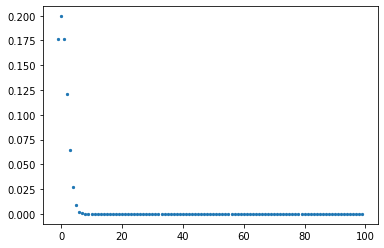

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-1, int(gridsize))

sigma = 0.02 * gridsize
print("sigma = " + str(sigma))
beta = 1./(sigma * np.sqrt(2*np.pi)) # amplitude of gaussian

fx = beta * np.exp(-((x - 0.)**2)/(2. * sigma**2))
plt.scatter(x, fx, s=5)
#plt.xlim(-1, 5)
#plt.ylim(0, 0.5)
plt.show()